In [12]:
using NPZ
using Interpolations
using Cubature
using PyCall
using LinearAlgebra
# mpb = pyimport("meep.mpb")
# mp = pyimport("meep")
# @pyimport matplotlib.animation as anim
# using PyPlot
using Plots
using Plots.PlotMeasures
pyplot();

In [13]:
include("xray_3dphc.jl");

## Read MPB save data

In [5]:
# data = npzread("phc3d_more_g.npz")
# data= npzread("phc3d_constant_eps.npz")
data = npzread("phc3d_dmnd_25.npz")
bands = npzread("phc3d_dmnd_bands.npz")["arr_0"]

kBZ = data["arr_0"]
Δk = kBZ[2] - kBZ[1]
krange = -0.75:Δk:0.75
# krange = -0.5:Δk:0.5

M1dat = data["arr_1"]
M2dat = data["arr_2"]
M3dat = data["arr_3"]
ωdat = data["arr_4"]
vgdat = data["arr_5"];

Nb = size(ωdat)[1]
NM = size(M1dat)[5]
ks = range(-0.75,0.75,length=70)
# ks = range(-0.5,0.5,length=70)

ωsplines = Array{Any,1}(undef, Nb)

for b in 1:Nb
    ωitp = interpolate(ωdat[b,:,:,:], BSpline(Quadratic(Flat(OnGrid()))));
#     ωitp = interpolate(ωdat[b,:,:,:], BSpline(Linear()));
    ωsitp = scale(ωitp, krange, krange, krange);
    ωsplines[b] = ωsitp
end

Msplines = Array{Any,5}(undef, Nb, NM, NM, NM, 3)
# ks_1BZ_BCC = [in_1BZ_BCC(BCC_to_cartesian_recip * [kx, ky, kz]) ? 1 : 0 for kx in krange, ky in krange, kz in krange]
for i in 1:3
    key = string("arr_", i)
    Mdat = data[key]
    for b in 1:Nb
        for nx in 1:NM
            for ny in 1:NM
                for nz in 1:NM
                    Mitp = interpolate(Mdat[b,:,:,:,nx,ny,nz], BSpline(Quadratic(Flat(OnCell()))));
                    Msitp = scale(Mitp, krange, krange, krange);
                    Msplines[b,nx,ny,nz,i] = Msitp
                end
            end
        end
    end
end


ωp = 1e19
ωi = 2e15
ωs = ωp - ωi
g = 3.1e10 #being approximate here
gvec = g * [1,0,0] # in the X direction as required by the dΓdωsdΩ functions
θB = asin(g*c/(2*ωp))
# println(θB)

χ = 2e-17
np = 1e20
# a = 0.5e-6 #PhC lattice spacing
a = 0.5e-6 # free space lattice spacing.... get more accurate modes??
L = 1e-3 #1mm where period is micron scale sounds reasonable

θdev = 0.001
ϕdev = 0.0025

P = PumpBeam(1e19, θB, 0.0)
D_dmnd_15 = PhC_Data(a, Msplines, ωsplines, 0);

## Animate it

ωi = 1
ωi = 2
ωi = 3
ωi = 4
ωi = 5
ωi = 6
ωi = 7
ωi = 8
ωi = 9
ωi = 10
ωi = 11
ωi = 12
ωi = 13
ωi = 14
ωi = 15
ωi = 16
ωi = 17
ωi = 18
ωi = 19
ωi = 20


sys:1: UserWarning: The following kwargs were not used by contour: 'label'
sys:1: UserWarning: The following kwargs were not used by contour: 'label'
sys:1: UserWarning: The following kwargs were not used by contour: 'label'
sys:1: UserWarning: The following kwargs were not used by contour: 'label'
sys:1: UserWarning: The following kwargs were not used by contour: 'label'
sys:1: UserWarning: The following kwargs were not used by contour: 'label'
sys:1: UserWarning: The following kwargs were not used by contour: 'label'
sys:1: UserWarning: The following kwargs were not used by contour: 'label'
sys:1: UserWarning: The following kwargs were not used by contour: 'label'
sys:1: UserWarning: The following kwargs were not used by contour: 'label'
sys:1: UserWarning: The following kwargs were not used by contour: 'label'
sys:1: UserWarning: The following kwargs were not used by contour: 'label'
sys:1: UserWarning: The following kwargs were not used by contour: 'label'
sys:1: UserWarning: The f

ωi = 21
ωi = 22
ωi = 23
ωi = 24
ωi = 25
ωi = 26
ωi = 27
ωi = 28
ωi = 29
ωi = 30
ωi = 31
ωi = 32
ωi = 33
ωi = 34
ωi = 35
ωi = 36
ωi = 37
ωi = 38
ωi = 39
ωi = 40
ωi = 41
ωi = 42
ωi = 43
ωi = 44
ωi = 45
ωi = 46
ωi = 47
ωi = 48
ωi = 49
ωi = 50


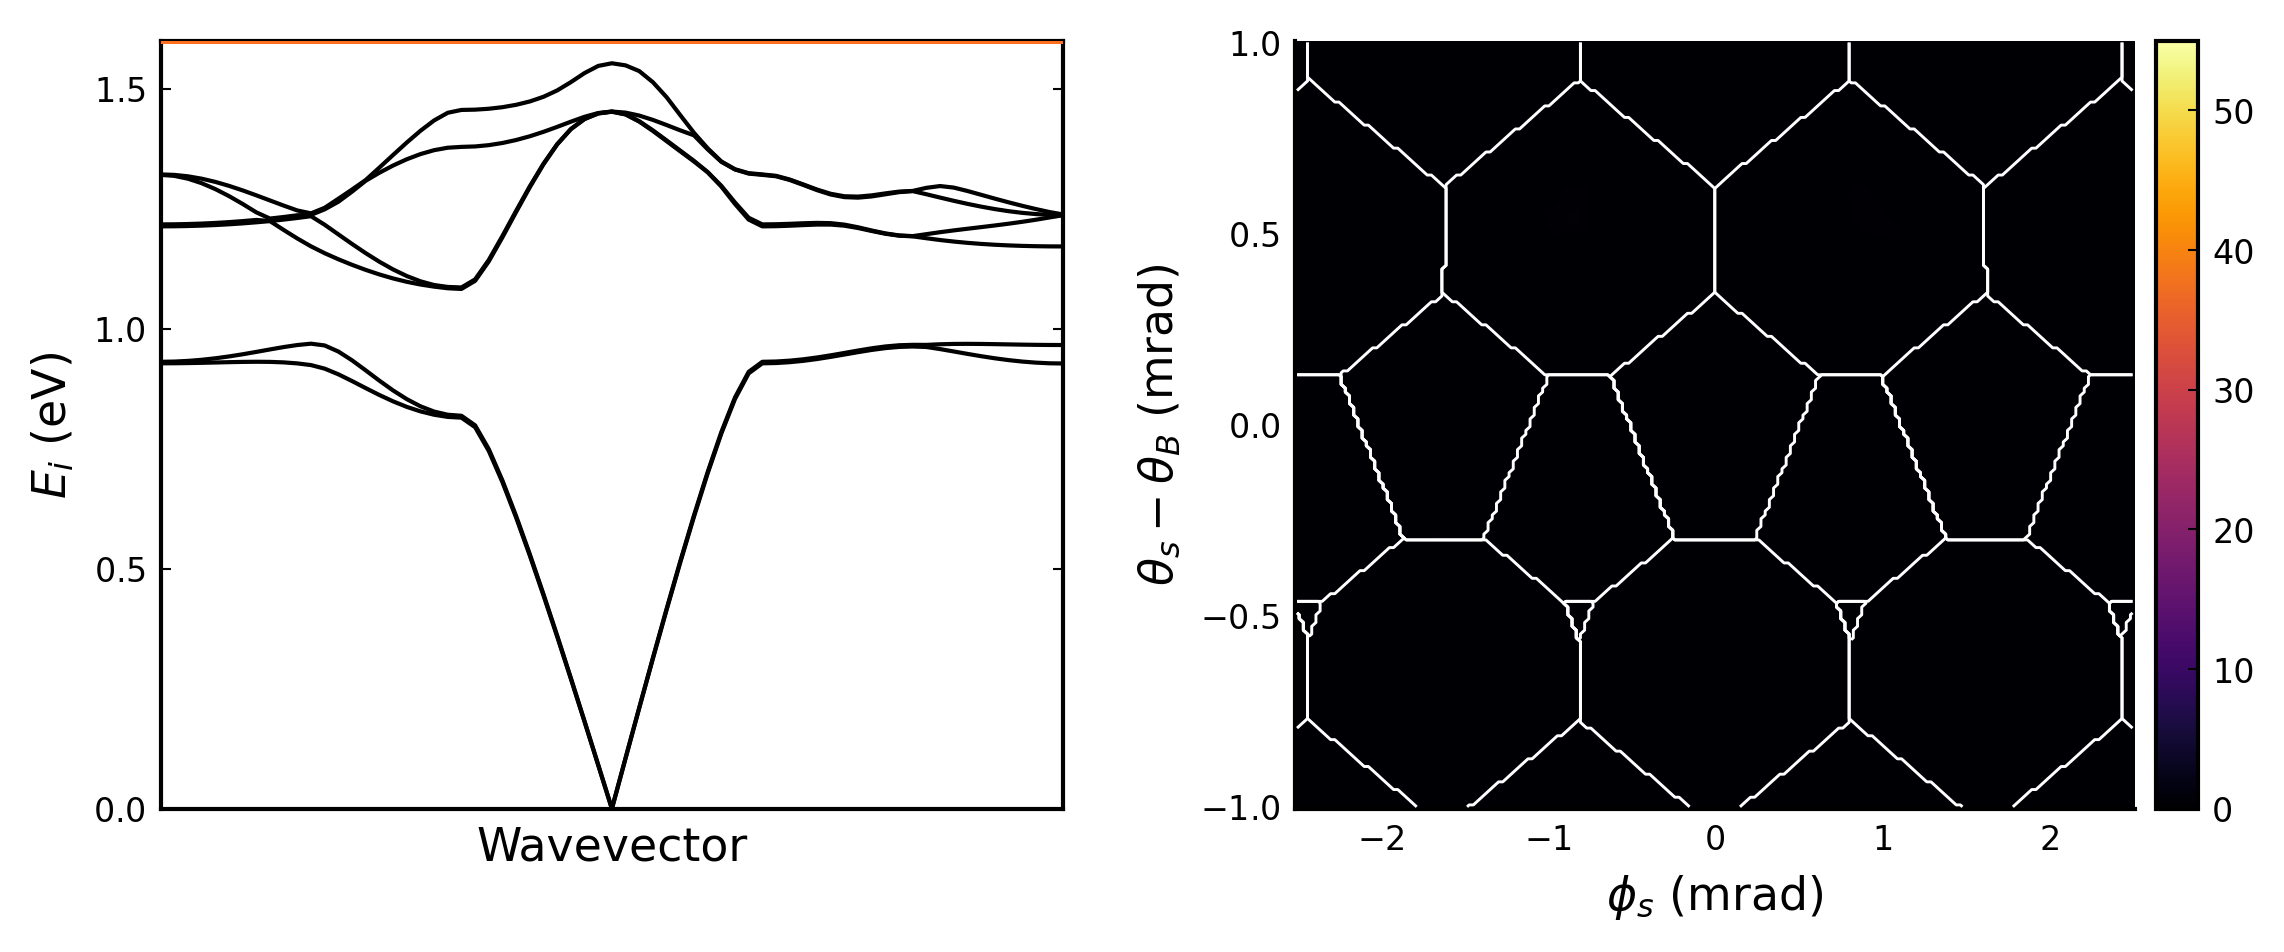

┌ Info: Saved animation to 
│   fn = /home/elinas/Research/xray/ang_anim_dmnd_r_0-25_2.gif
└ @ Plots /home/elinas/.julia/packages/Plots/KN96c/src/animation.jl:104


Plots.AnimatedGif("/home/elinas/Research/xray/ang_anim_dmnd_r_0-25_2.gif")
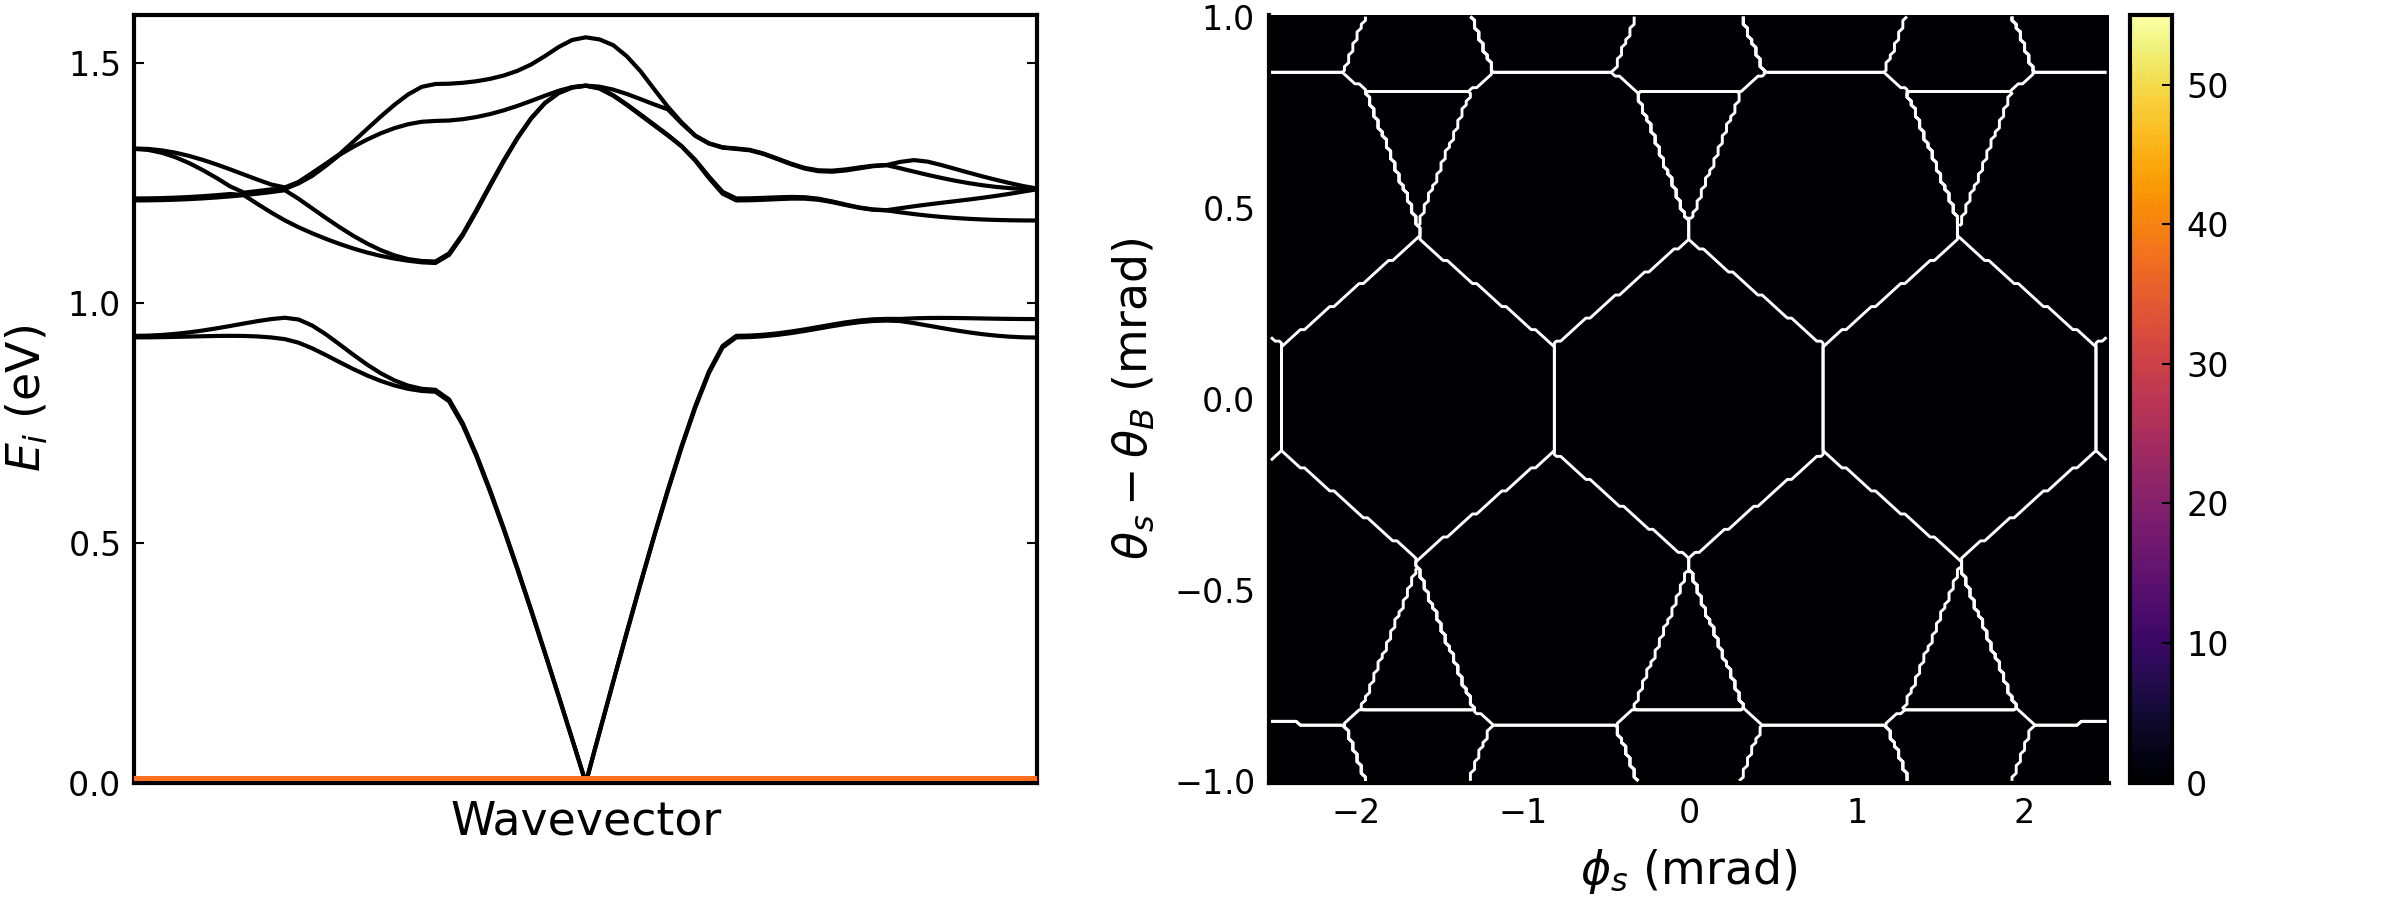

In [14]:
Nangles = 200
θrange = range(θB - θdev, θB + θdev, length=Nangles)
ϕrange = range(-ϕdev, ϕdev, length=Nangles)
Δθ = θrange[2]-θrange[1]
Δϕ = ϕrange[2]-ϕrange[1]
dat = zeros(Nangles,Nangles)

Nω = 50
Emax = 1.6
ωirange = range(0.01/ħeV, Emax/ħeV, length=Nω)

# p = Plots.heatmap(ϕrange, θrange, dat)
# Plots.plot(p, size=(550,400), dpi=300)
an = @animate for i ∈ 1:Nω
    println("ωi = ", string(i))
    global dat = zeros(Nangles,Nangles)
    
    Threads.@threads for b in 1:Nb
        newdat = [dΓdωdΩ_stitch_FCC(ωp - ωirange[i], θs, ϕs, gvec, P, D_dmnd_15, χ, np, L, b)*sin(θs)
                            for θs in θrange, ϕs in ϕrange]
        global dat .+= newdat
    end
    
    colors1 = zeros(Nangles, Nangles)
    colors2 = zeros(Nangles, Nangles)
    colors3 = zeros(Nangles, Nangles)
    ωs = ωp - ωirange[i]

    for (i, θs) in enumerate(θrange)
        for (j, ϕs) in enumerate(ϕrange)
            kB0x = (-ωs/c*sin(θs)*cos(ϕs) - ωp/c*sin(θB) + gvec[1])*a/(2π)
            kB0y = -ωs/c*sin(θs)*sin(ϕs)*a/(2π)
            kB0z = (-ωs/c*cos(θs) + ωp/c*cos(θB))*a/(2π)
            offset = bring_into_1BZ_FCC(kB0x, kB0y, kB0z)[2]
            colors1[i, j] = offset[1]
            colors2[i, j] = offset[2]
            colors3[i, j] = offset[3]
        end
    end
    
    Plots.heatmap(ϕrange, θrange, dat, clims=(0, 55))
    p2 = Plots.contour!(ϕrange, θrange, [colors1,colors2,colors3], levels=-5.5:5.5, color=["white"], linewidth=0.7, ylabel=L"$θ_s-θ_B$ (mrad)", xlabel=L"$ϕ_s$ (mrad)",
        yticks=(collect(-1:0.5:1)./1000 .+ θB, collect(-1:0.5:1)),
        xticks=(collect(-0.002:0.001:0.002), collect(-2:1:2)))
    
    p1 = Plots.plot(bands * 2π* c /0.5e-6 * ħeV, color="black", xticks=[], xlabel="Wavevector",
        right_margin=70px, legend=false, grid=false, framestyle=:box, xlims=(1, size(bands)[1]), ylims=(0, Emax))
    Plots.hline!([ωirange[i]*ħeV], linestyle=:solid, color="#fe6f20", linewidth=1.2)
    yaxis!(L"$E_i$ (eV)")
    Plots.plot(p1, p2, size=(800,300), dpi=300)

end
gif(an, "ang_anim_dmnd_r_0-25_2.gif", fps=5)

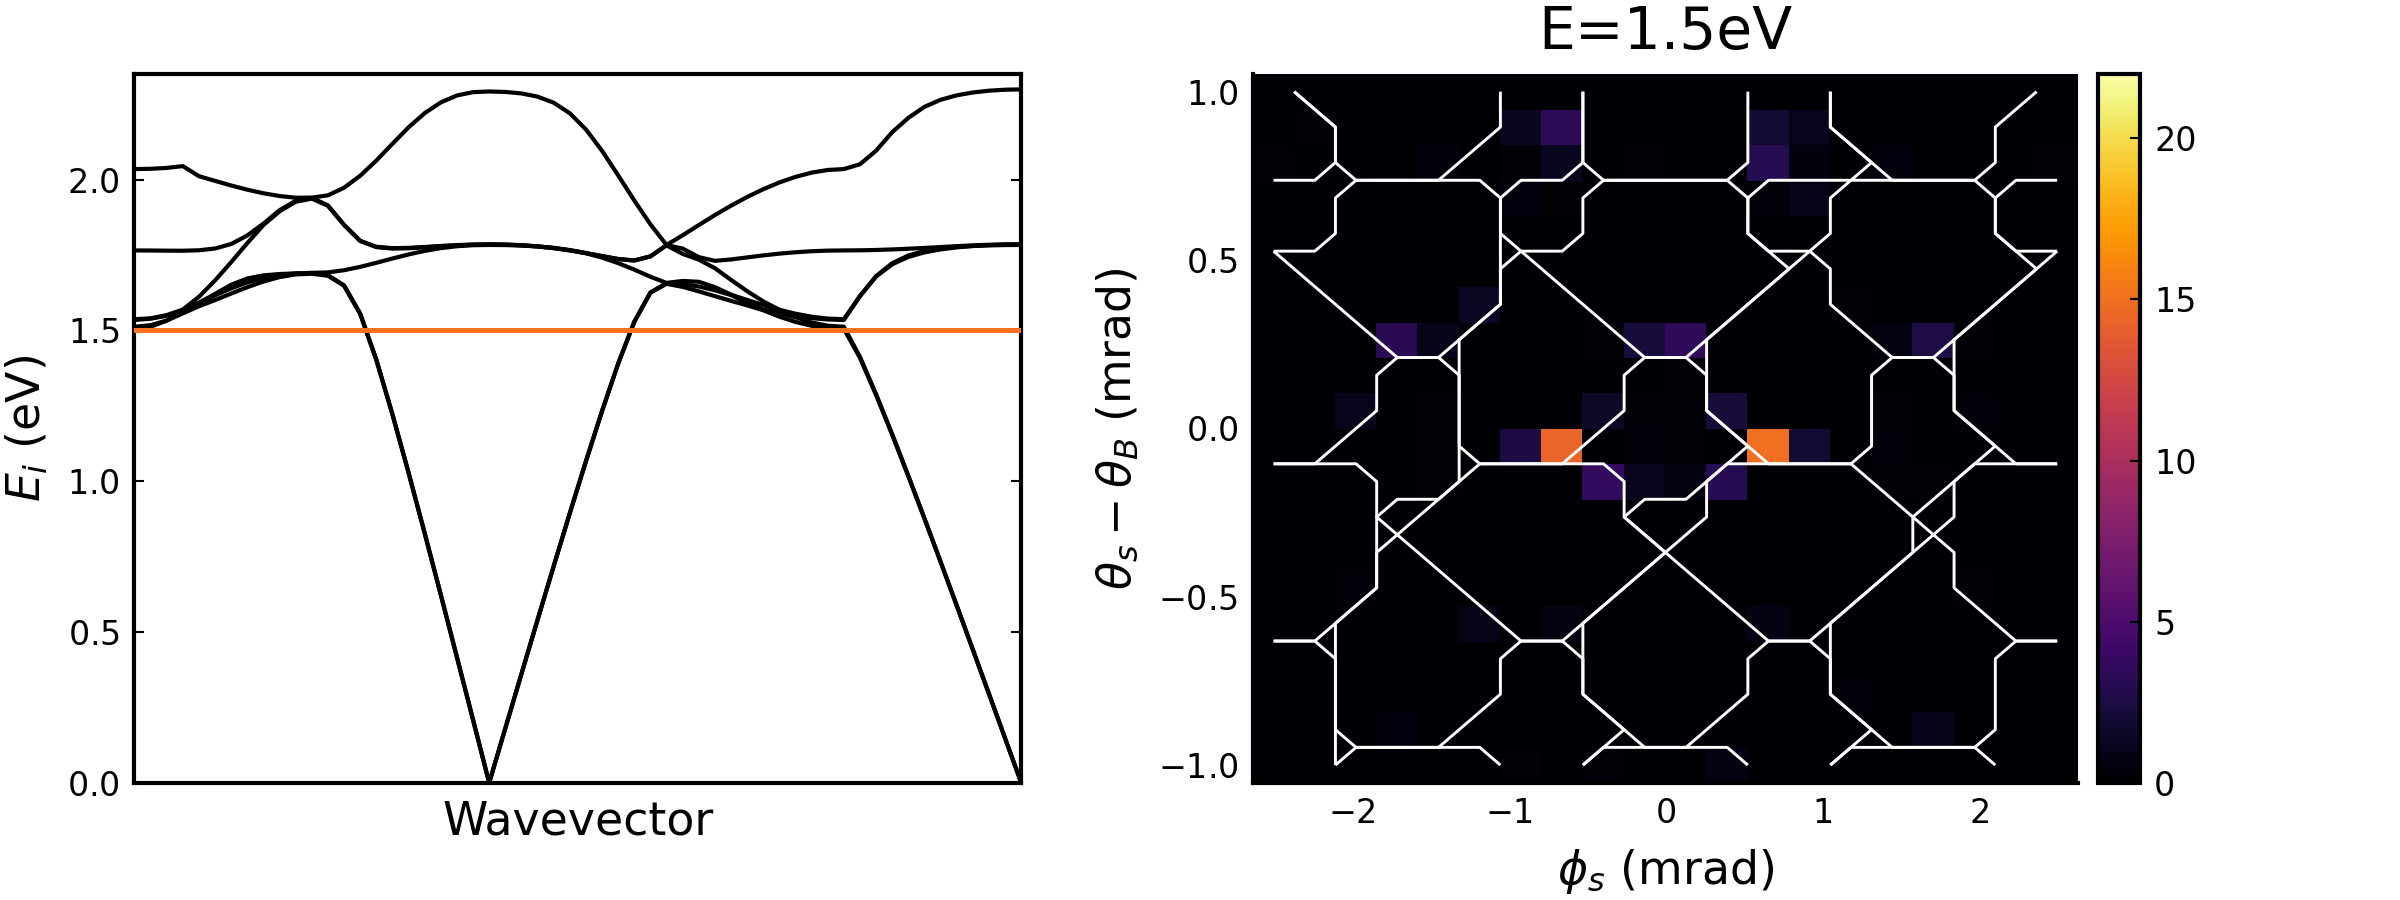

In [68]:
Nangles = 20
θrange = range(θB - θdev, θB + θdev, length=Nangles)
ϕrange = range(-ϕdev, ϕdev, length=Nangles)
Δθ = θrange[2]-θrange[1]
Δϕ = ϕrange[2]-ϕrange[1]

ωi = 1.5/ħeV
# p = Plots.heatmap(ϕrange, θrange, dat)
# Plots.plot(p, size=(550,400), dpi=300)
dat = zeros(Nangles,Nangles)

Threads.@threads for b in 1:Nb
    newdat = [dΓdωdΩ_stitch_BCC(ωp - ωi, θs, ϕs, gvec, P, D_bcc_21, χ, np, L, b)*sin(θs)
                        for θs in θrange, ϕs in ϕrange]
    global dat = dat .+ newdat
end

colors1 = zeros(Nangles, Nangles)
colors2 = zeros(Nangles, Nangles)
colors3 = zeros(Nangles, Nangles)
# ωs = ωp - ωirange[i]
ωs = ωp - ωi

for (i, θs) in enumerate(θrange)
    for (j, ϕs) in enumerate(ϕrange)
        kB0x = (-ωs/c*sin(θs)*cos(ϕs) - ωp/c*sin(θB) + gvec[1])*a/(2π)
        kB0y = -ωs/c*sin(θs)*sin(ϕs)*a/(2π)
        kB0z = (-ωs/c*cos(θs) + ωp/c*cos(θB))*a/(2π)
        offset = bring_into_1BZ_BCC(kB0x, kB0y, kB0z)[2]
        colors1[i, j] = offset[1]
        colors2[i, j] = offset[2]
        colors3[i, j] = offset[3]
    end
end

    
Plots.heatmap(ϕrange, θrange, dat, clims=(0, 22), title="E=$(round(ωi*ħeV, digits=3))eV")
p2 = Plots.contour!(ϕrange, θrange, [colors1,colors2,colors3], levels=-5.5:5.5, color=["white"], linewidth=0.7, ylabel=L"$θ_s-θ_B$ (mrad)", xlabel=L"$ϕ_s$ (mrad)",
    yticks=(collect(-1:0.5:1)./1000 .+ θB, collect(-1:0.5:1)),
    xticks=(collect(-0.002:0.001:0.002), collect(-2:1:2)))


bands = npzread("phc3d_bands_bcc.npz")["arr_0"]
p1 = Plots.plot(bands * 2π* c /0.5e-6 * ħeV, color="black", xticks=[], xlabel="Wavevector",
    right_margin=70px, legend=false, grid=false, framestyle=:box, xlims=(1, size(bands)[1]), ylims=(0, 2.35))
Plots.hline!([ωi*ħeV], linestyle=:solid, color="#fe6f20", linewidth=1.2)
yaxis!(L"$E_i$ (eV)")
Plots.plot(p1, p2, size=(800,300), dpi=300)

# Plots.contour!(ϕrange, θrange, colors2, levels=-5.5:5.5, color=["white"], linewidth=0.7)
# Plots.contour!(ϕrange, θrange, colors3, levels=-5.5:5.5, color=["white"], linewidth=0.7)
# Plots.xticks!(collect(-1:0.5:1)./1000 .+ θB, collect(-1:0.5:1))


In [46]:
size(bands)

(56, 6)